# Project: Telcocom Customer Churn Prediction with RandomForest

- Team members: 
  1. Devanshi Shrivastava
  2. Aditya Bahadur

## Task
Enhance the churn prediction model with Random Forest for better accuracy. 
## Goal
Explore ensemble methods, feature importance, and hyperparameter tuning.
## Dataset Description

The dataset contains information on telecom customers such as their demographics, usage patterns, and account information. The target variable is whether the customer churned (1) or not (0). The dataset has 7,043 observations and 20 input features.
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

**Source of dataset: https://www.kaggle.com/datasets**

In [1]:
#libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#dataset importing
data = pd.read_csv('C:/Users/KIIT/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Preprocessing:

In [5]:
df = data.copy()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [7]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                      'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
                      'Churn']

### Analyzing the relationship

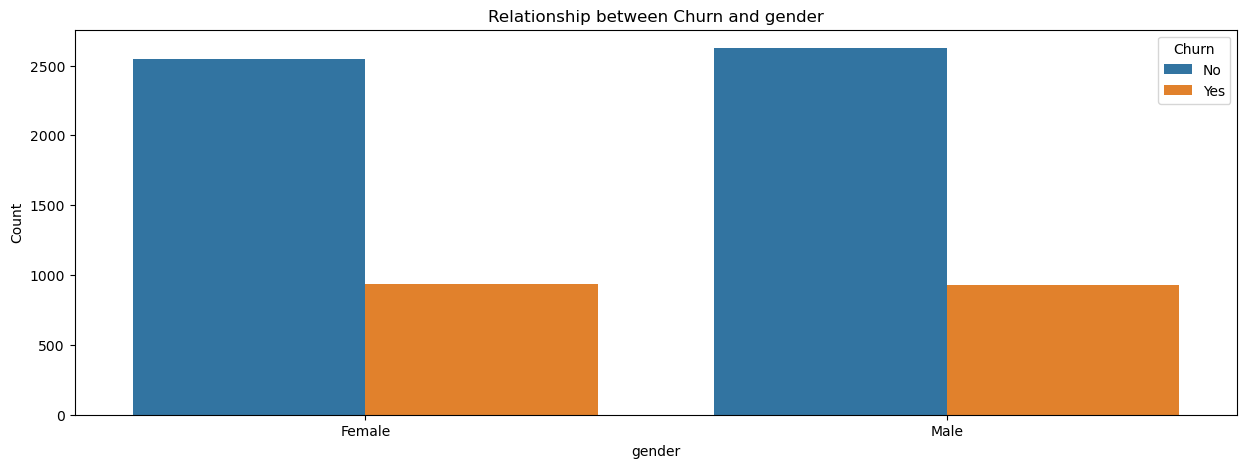

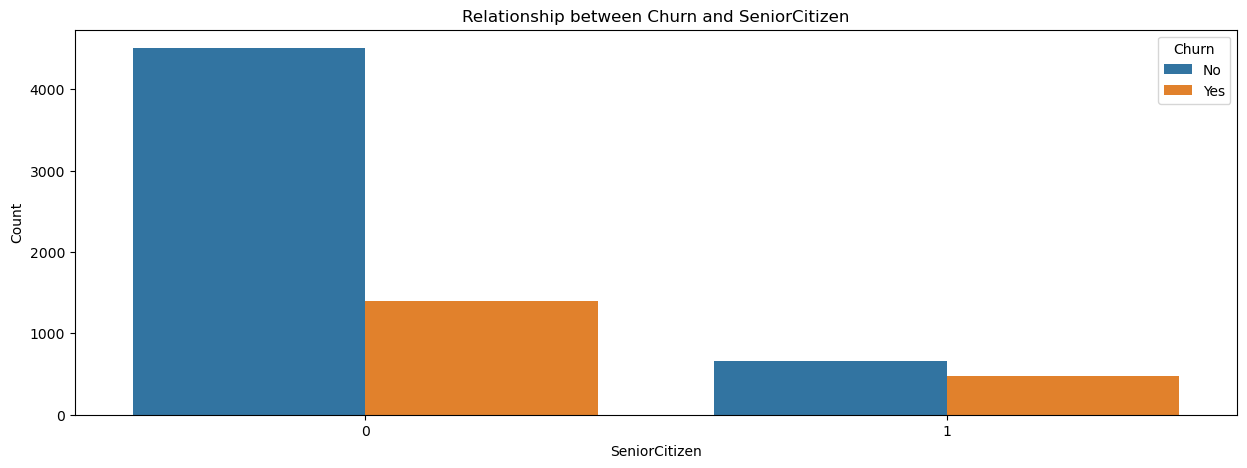

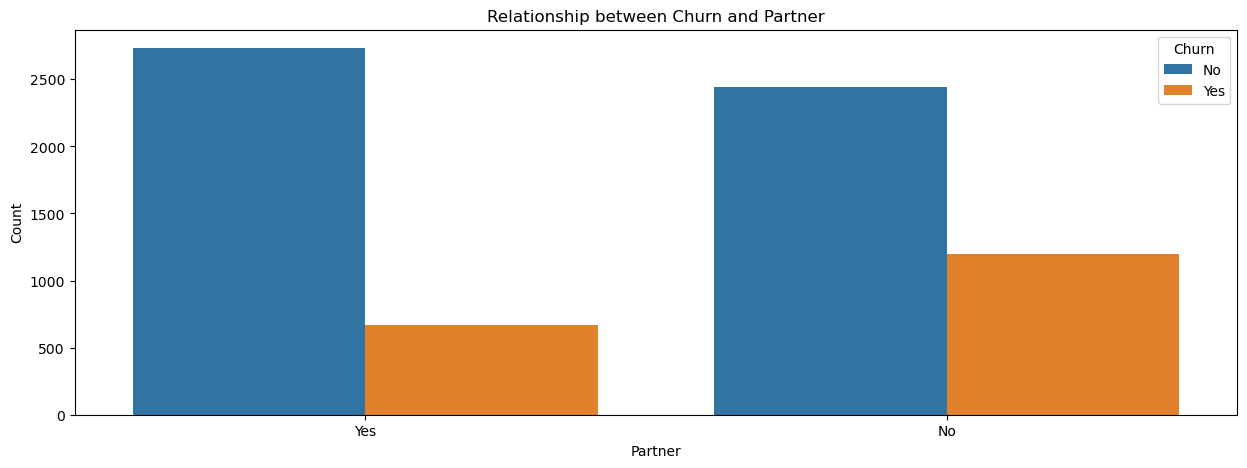

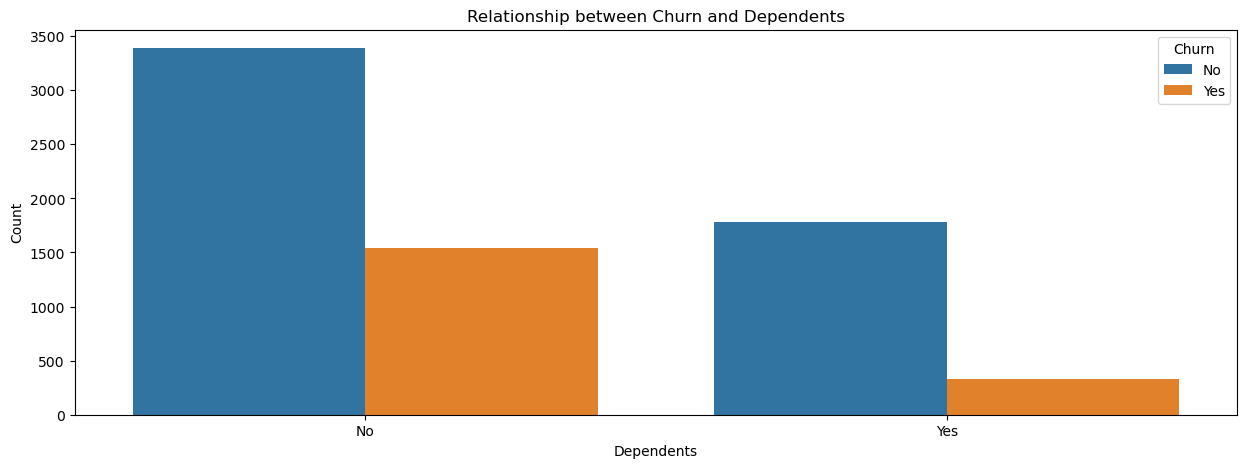

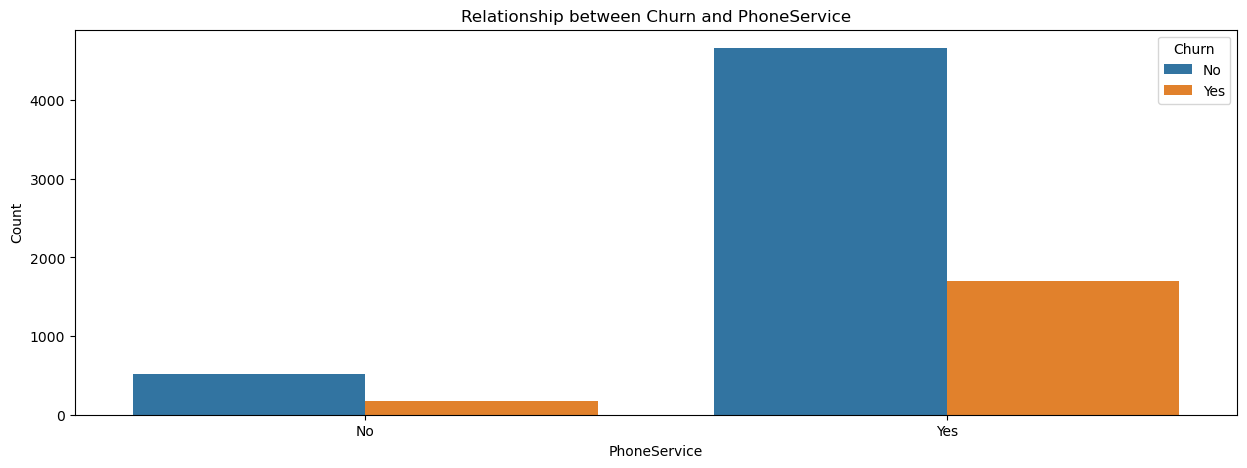

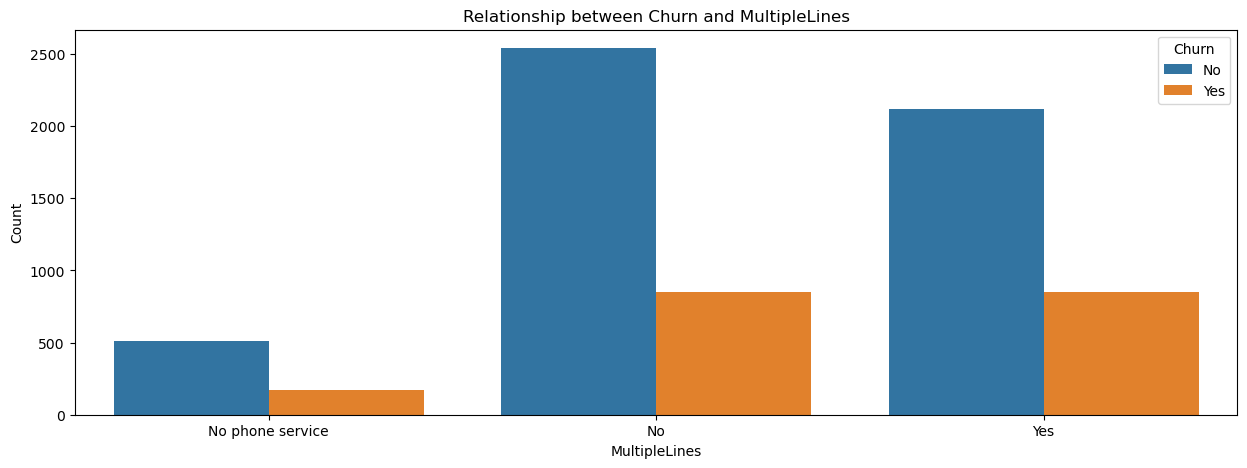

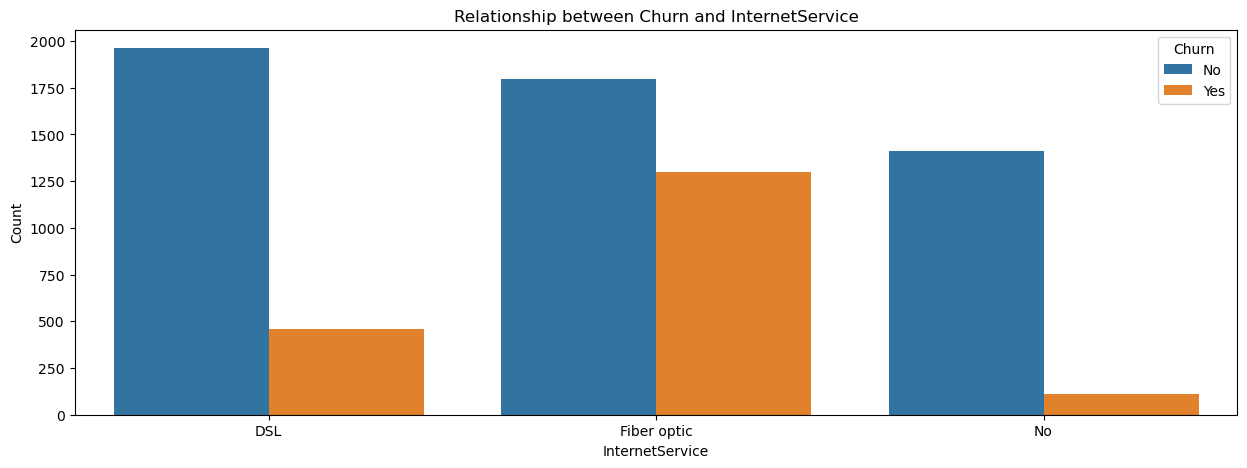

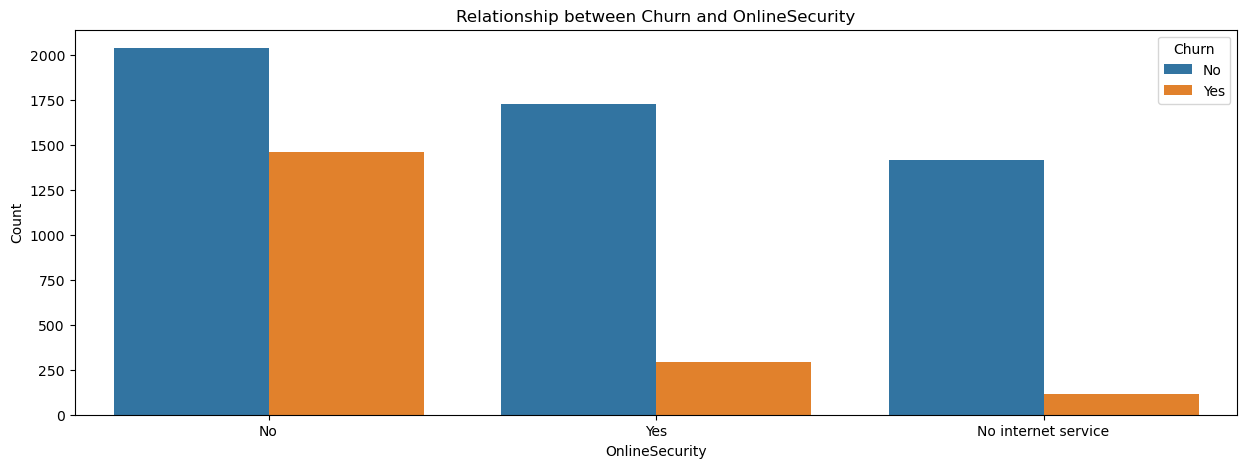

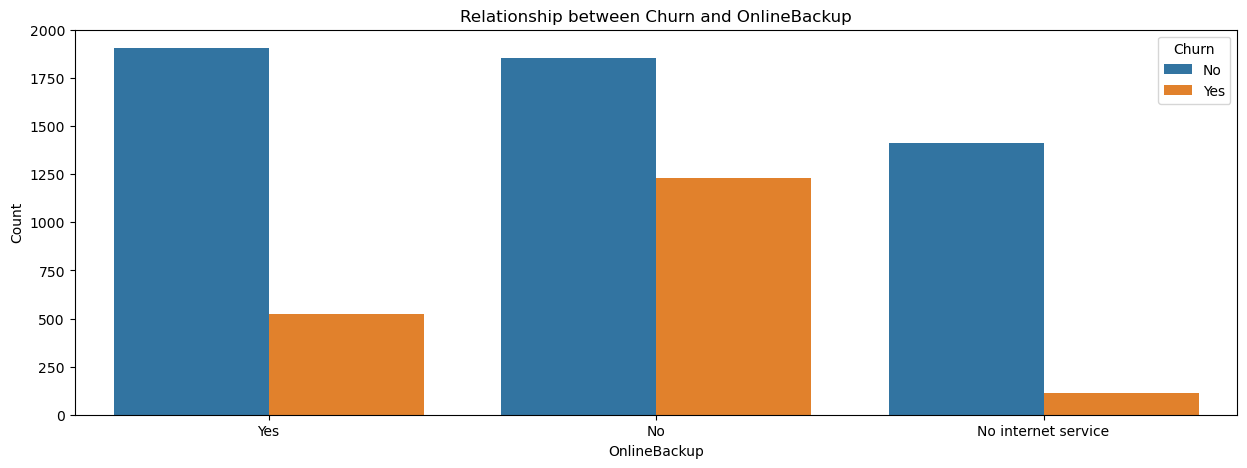

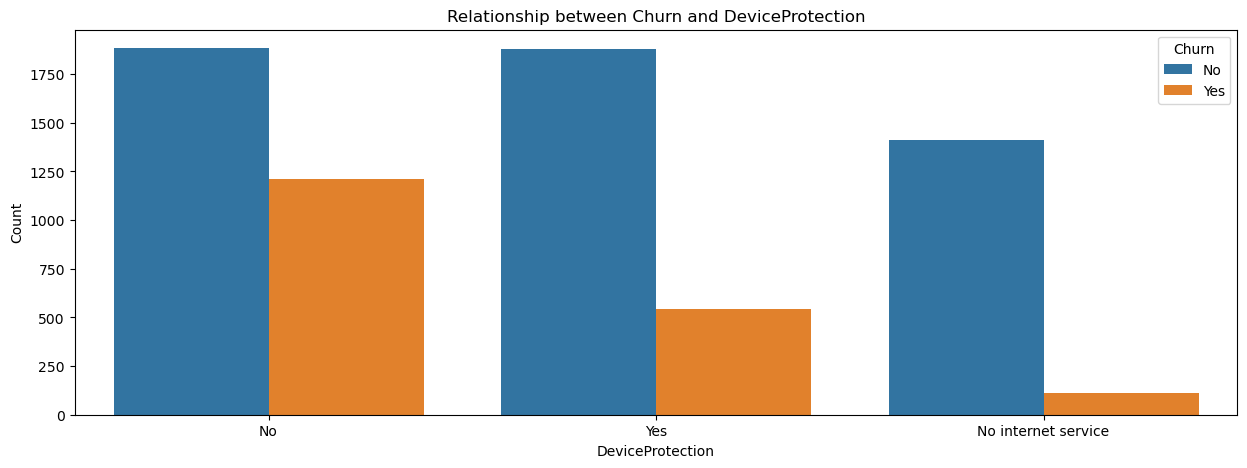

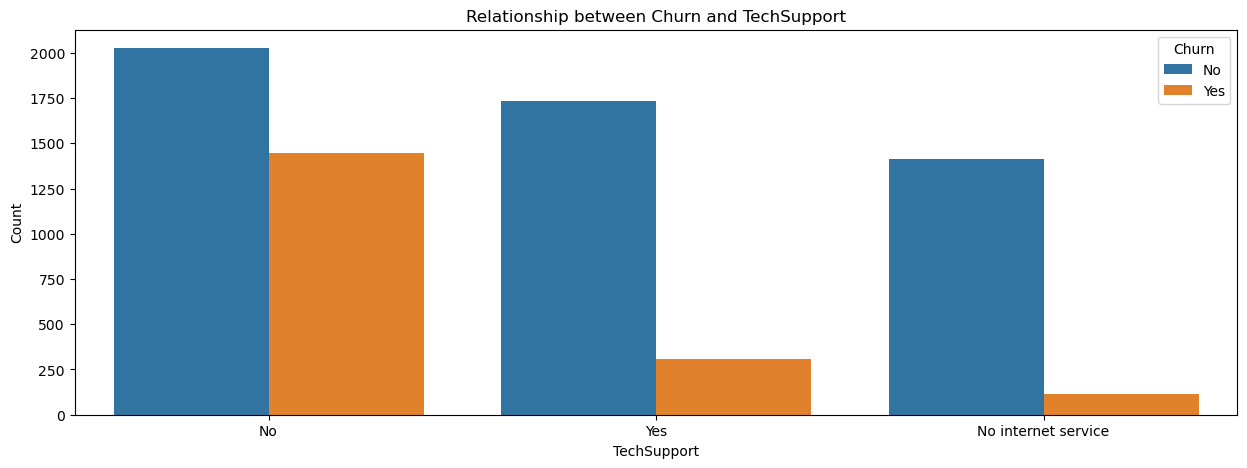

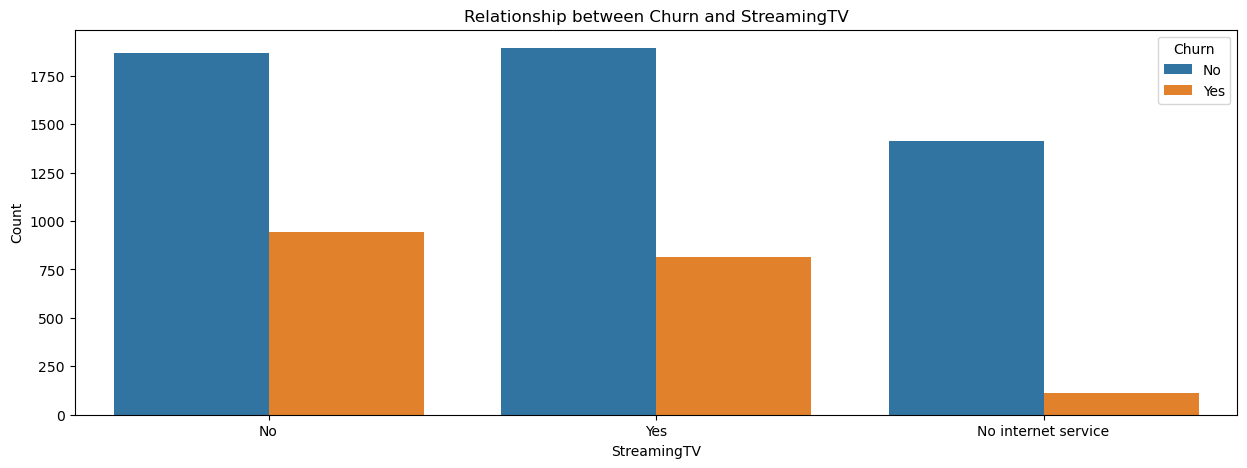

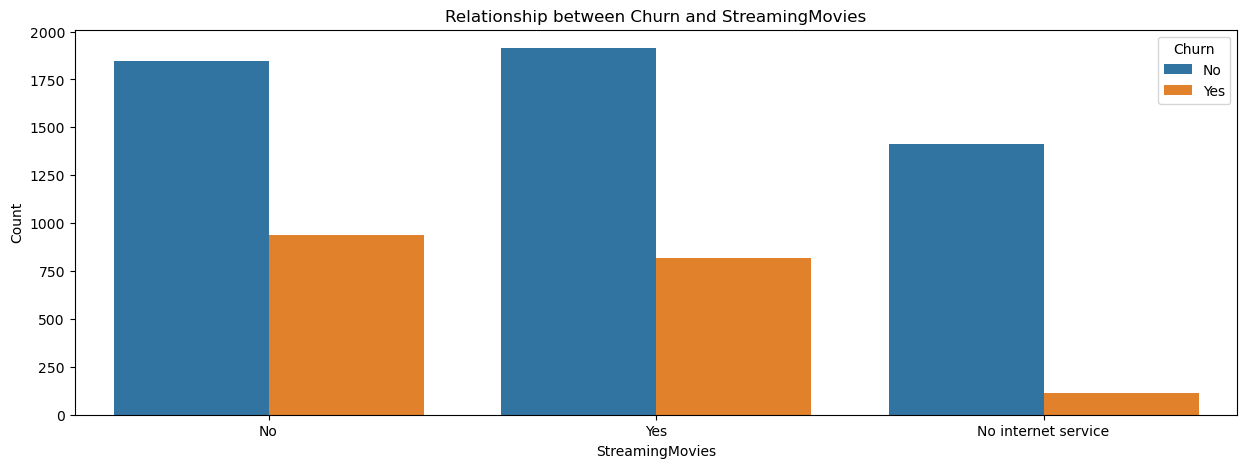

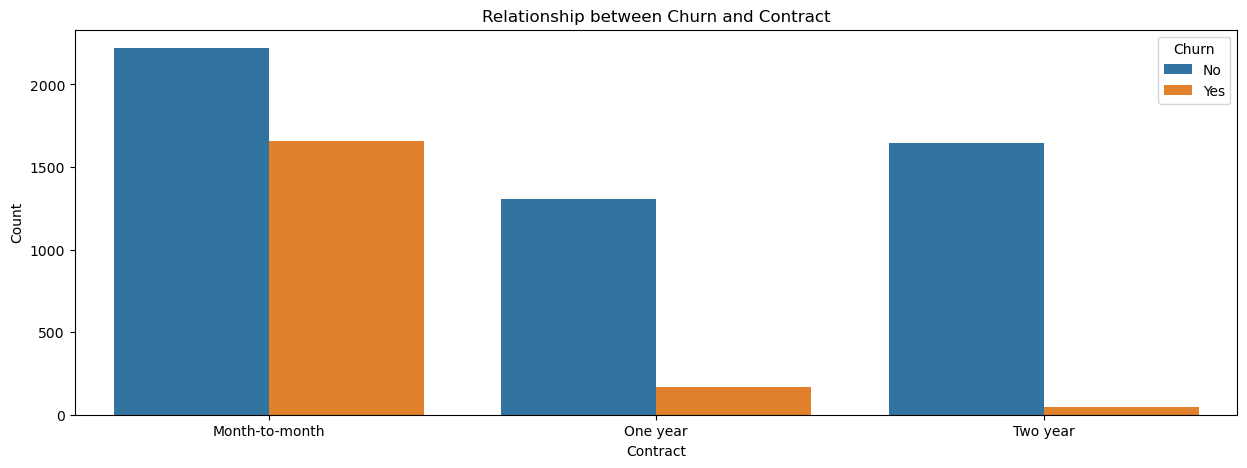

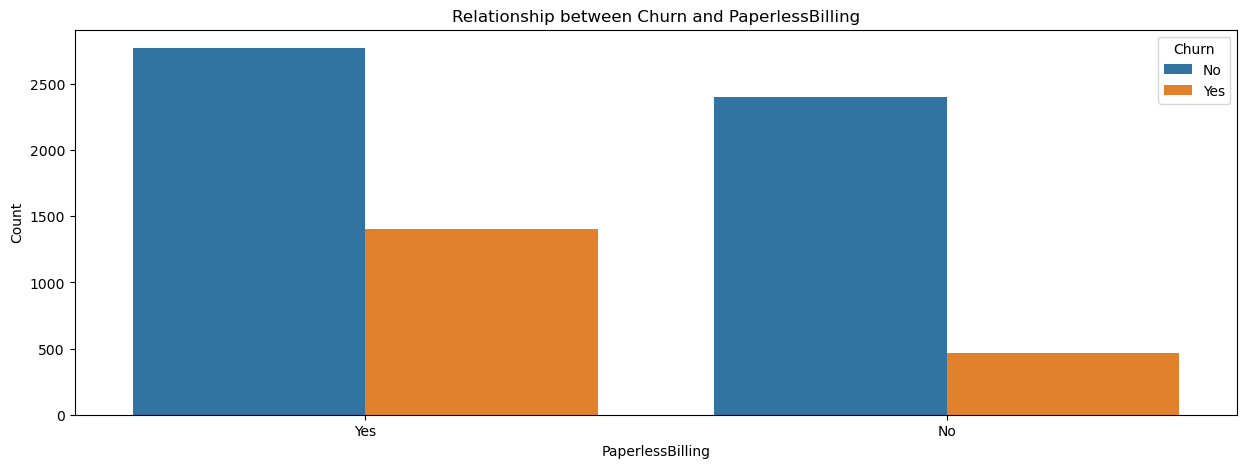

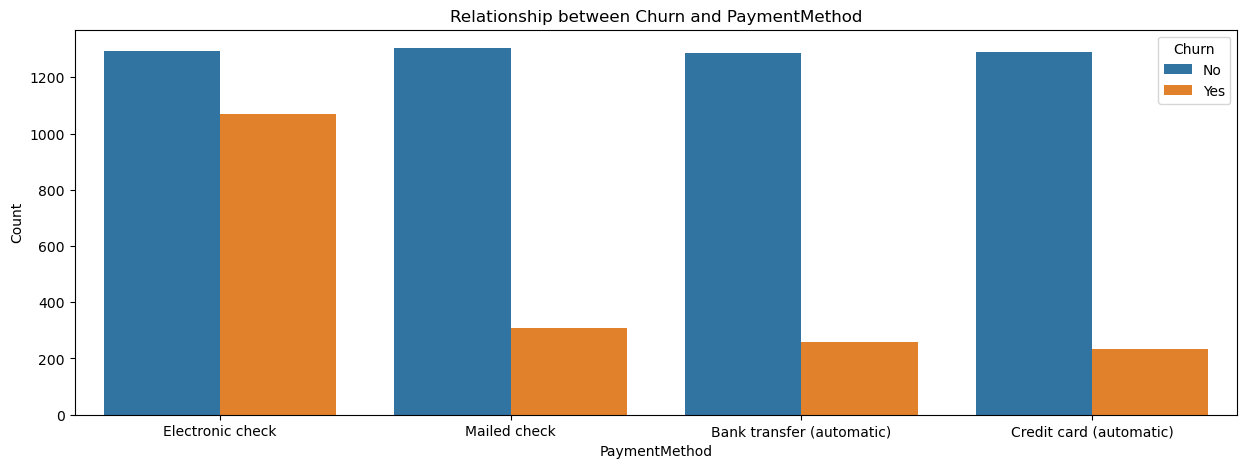

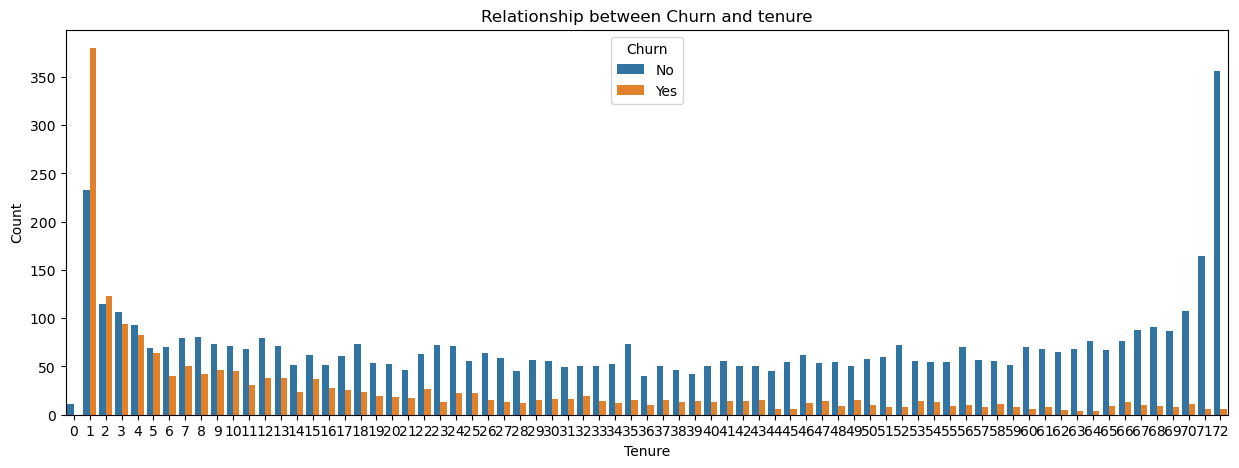

In [8]:
for col in categorical_columns[:-1]:
    # Create a bar chart for the column
    plt.figure(figsize=(15, 5))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Relationship between Churn and {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.figure(figsize=(15,5))
sns.countplot(x="tenure", hue="Churn", data=df)
plt.title("Relationship between Churn and tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

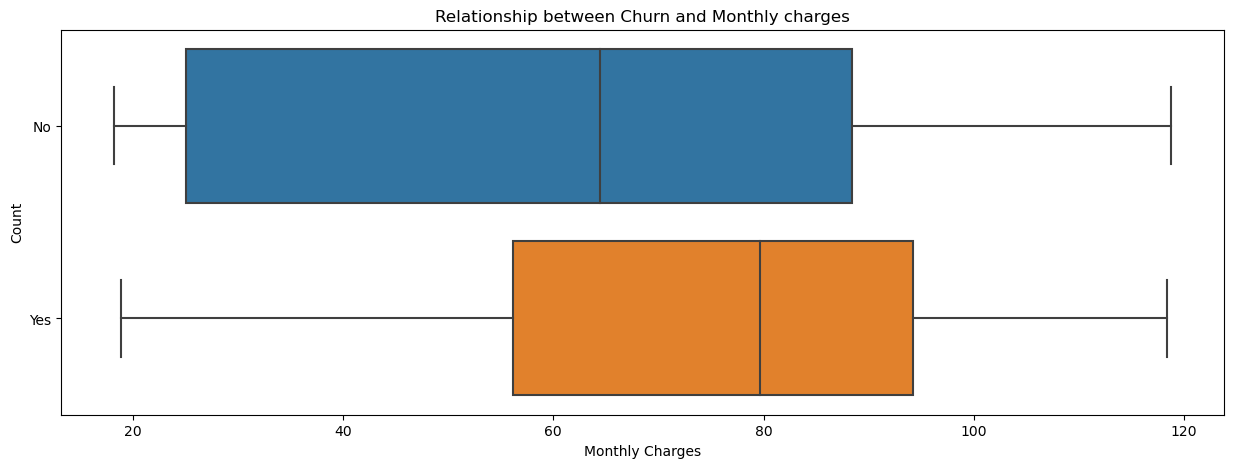

In [9]:
# Create the chart to see the relationship between Monthly charges and Churn
plt.figure(figsize=(15,5))
sns.boxplot(x="MonthlyCharges", y="Churn", data=df)
plt.title("Relationship between Churn and Monthly charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

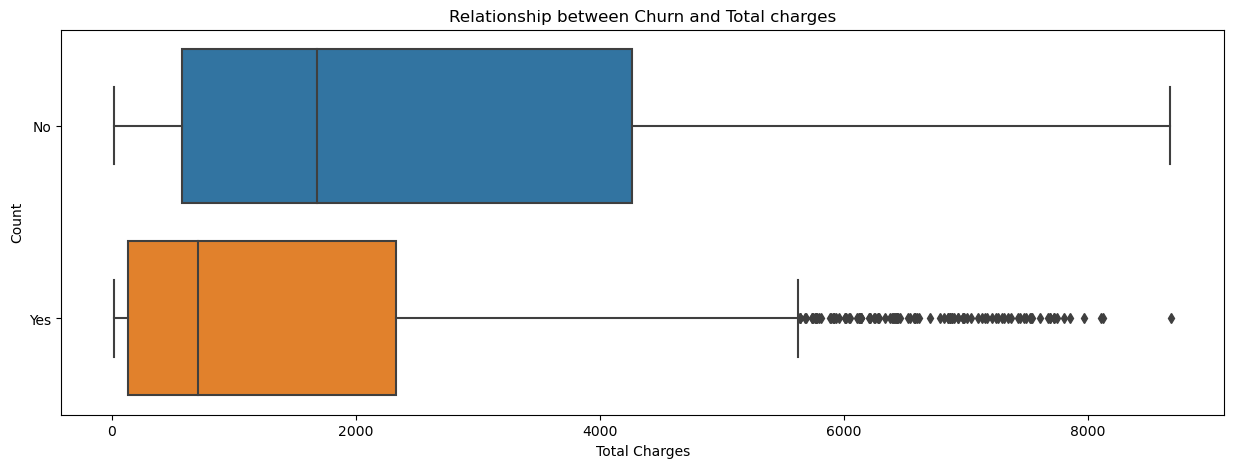

In [10]:
# Create the chart to see the relationship between Total charges and Churn
plt.figure(figsize=(15,5))
sns.boxplot(x="TotalCharges", y="Churn", data=df)
plt.title("Relationship between Churn and Total charges")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.show()

**What can we conclude?**

- Customer is not a senior citizen and does not have dependants.
- Customer does not have a partner.
- Customer uses Phone Services and Internet Services.
- Customer uses month-to-month contract with Paperless Billing i.e. Electronic Check as payment method.
- Tenure < 1 year.
- Month charges: {57,95}
- Total charges: {30, 2200}

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Text(0.5, 1.0, 'Distribution of the total charges')

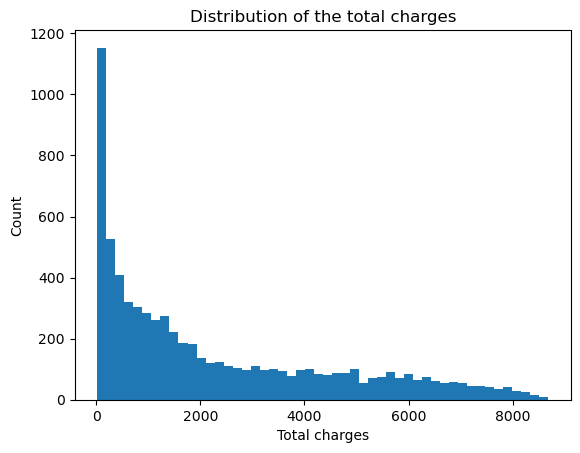

In [11]:
#Checking if the distribution is skewed or symmetric.
plt.hist(x=df["TotalCharges"], bins=50)
plt.xlabel("Total charges")
plt.ylabel("Count")
plt.title("Distribution of the total charges")

In [13]:
# Since the distribution is skewed, we used median to fill the missing values
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
rf_data = df.copy()

In [16]:
# Create new features that divides tenure by each 1 year tenure range
rf_data['TenureRange'] = pd.cut(rf_data['tenure'], bins=[-1,12,24,36,48,60,72], labels=['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '>5 years'])

# Create new feature that indicates the total number of services that the customer use
rf_data["TotalServices"] = rf_data[['PhoneService', 'InternetService', 
                                                         'OnlineSecurity', 'OnlineBackup', 
                                                         'DeviceProtection', 'TechSupport', 
                                                         'StreamingTV', 'StreamingMovies']].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0}).sum(axis=1)

# Create new feature that concerns about security
rf_data["Security"] = (rf_data["OnlineSecurity"] == 'Yes') & (rf_data["DeviceProtection"] == 'Yes')

# Create new feature that concerns about entertainment
rf_data["Entertainment"] = (rf_data["StreamingTV"] == 'Yes') & (rf_data["StreamingMovies"] == 'Yes')

# Create new feature that concerns about senior citizen that need technical support
rf_data["SeniorTechSupport"] = (rf_data["SeniorCitizen"] == 1) & (rf_data["TechSupport"] == 'Yes')

# Create new feature that concerns about billing and payment method
rf_data["BillingAndPayment"] = (rf_data["PaperlessBilling"] == 'Yes') & (rf_data["PaymentMethod"] == 'Electronic check')

# Create new feature that divides monthly charges by every 20 dollars range
rf_data['MonthlyChargesRange'] = pd.cut(rf_data['MonthlyCharges'], bins=[-1,20,40,60,80,100,120], labels=['Monthly 0-20$', 'Monthly 20-40$', 'Monthly 40-60$', 'Monthly 60-80$', 'Monthly 80-100$', 'Monthly 100-120$'])


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16200\3108980334.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  rf_data["TotalServices"] = rf_data[['PhoneService', 'InternetService',


In [17]:
rf_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,MonthlyCharges,TotalCharges,Churn,TenureRange,TotalServices,Security,Entertainment,SeniorTechSupport,BillingAndPayment,MonthlyChargesRange
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,29.85,29.85,No,0-1 year,1,False,False,False,True,Monthly 20-40$
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,56.95,1889.50,No,2-3 years,3,True,False,False,False,Monthly 40-60$
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,53.85,108.15,Yes,0-1 year,3,False,False,False,False,Monthly 40-60$
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,42.30,1840.75,No,3-4 years,3,True,False,False,False,Monthly 40-60$
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,70.70,151.65,Yes,0-1 year,1,False,False,False,True,Monthly 60-80$


In [18]:
train_data = rf_data.copy()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7043 non-null   object  
 1   gender               7043 non-null   object  
 2   SeniorCitizen        7043 non-null   int64   
 3   Partner              7043 non-null   object  
 4   Dependents           7043 non-null   object  
 5   tenure               7043 non-null   int64   
 6   PhoneService         7043 non-null   object  
 7   MultipleLines        7043 non-null   object  
 8   InternetService      7043 non-null   object  
 9   OnlineSecurity       7043 non-null   object  
 10  OnlineBackup         7043 non-null   object  
 11  DeviceProtection     7043 non-null   object  
 12  TechSupport          7043 non-null   object  
 13  StreamingTV          7043 non-null   object  
 14  StreamingMovies      7043 non-null   object  
 15  Contract             

In [19]:
train_data.drop('customerID', axis=1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               7043 non-null   object  
 1   SeniorCitizen        7043 non-null   int64   
 2   Partner              7043 non-null   object  
 3   Dependents           7043 non-null   object  
 4   tenure               7043 non-null   int64   
 5   PhoneService         7043 non-null   object  
 6   MultipleLines        7043 non-null   object  
 7   InternetService      7043 non-null   object  
 8   OnlineSecurity       7043 non-null   object  
 9   OnlineBackup         7043 non-null   object  
 10  DeviceProtection     7043 non-null   object  
 11  TechSupport          7043 non-null   object  
 12  StreamingTV          7043 non-null   object  
 13  StreamingMovies      7043 non-null   object  
 14  Contract             7043 non-null   object  
 15  PaperlessBilling     

In [20]:
#converting data to numeric value and grouping:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
bi_group_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 
                    'Churn', 'Security', 'Entertainment', 'SeniorTechSupport', 'BillingAndPayment']
for col in bi_group_columns:
    train_data[col] = encoder.fit_transform(train_data[col])
    
multi_group_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaymentMethod', 'TenureRange', 'MonthlyChargesRange']
train_data = pd.get_dummies(train_data, columns=multi_group_columns, drop_first=True)

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int32  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int32  
 3   Dependents                             7043 non-null   int32  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int32  
 6   PaperlessBilling                       7043 non-null   int32  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int32  
 10  TotalServices                          7043 non-null   int64  
 11  Secu

In [22]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Split your dataset into features and target
X_RF_GB = train_data.drop('Churn', axis=1)
y_RF_GB = train_data['Churn']

# Create a Random Forest classifier
rf_class = RandomForestClassifier()

# Train the model
rf_class.fit(X_RF_GB, y_RF_GB)

# Get the feature importances
rf_imp = rf_class.feature_importances_

# Create a DataFrame for rf_imp
imp_table = pd.DataFrame({"Features": X_RF_GB.columns, 
                          "Importance": rf_imp}).sort_values(by="Importance", ascending=False)
imp_table.reset_index(drop=True)

,Features,Importance
0,TotalCharges,0.170653
1,tenure,0.143539
2,MonthlyCharges,0.141188
3,InternetService_Fiber optic,0.037574
4,TotalServices,0.035670
5,BillingAndPayment,0.030181
6,gender,0.026844
7,Partner,0.023239
8,PaymentMethod_Electronic check,0.023136
9,Contract_Two year,0.022172


In [23]:
selected_train_data = train_data[["InternetService_Fiber optic", "PaymentMethod_Electronic check", 
                                  "BillingAndPayment", "MonthlyCharges", "PaperlessBilling", "SeniorCitizen", 
                                 "Partner", "Security", "Dependents", "TechSupport_Yes", "OnlineSecurity_Yes", 
                                 "Contract_One year", "TotalCharges", "TenureRange_>5 years", "InternetService_No", 
                                 "StreamingMovies_No internet service", "StreamingTV_No internet service", 
                                 "TechSupport_No internet service", "OnlineBackup_No internet service", 
                                 "OnlineSecurity_No internet service", "DeviceProtection_No internet service", 
                                 "Contract_Two year", "tenure", "Churn"]].copy()
selected_train_data

,InternetService_Fiber optic,PaymentMethod_Electronic check,BillingAndPayment,MonthlyCharges,PaperlessBilling,SeniorCitizen,Partner,Security,Dependents,TechSupport_Yes,...,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service,Contract_Two year,tenure,Churn
0,0,1,1,29.85,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,56.95,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,34,0
2,0,0,0,53.85,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
3,0,0,0,42.30,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,45,0
4,1,1,1,70.70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,84.80,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,24,0
7039,1,0,0,103.20,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,72,0
7040,0,1,1,29.60,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,11,0
7041,1,0,0,74.40,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,4,1


### Standardization

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit(selected_train_data.drop('Churn', axis=1))
scaled_selected_train_data = scaler.transform(selected_train_data.drop('Churn',axis=1))

table_scaled_selected_train_data = pd.DataFrame(scaled_selected_train_data, columns=selected_train_data.columns[:-1])
table_scaled_selected_train_data.head()

,InternetService_Fiber optic,PaymentMethod_Electronic check,BillingAndPayment,MonthlyCharges,PaperlessBilling,SeniorCitizen,Partner,Security,Dependents,TechSupport_Yes,...,TenureRange_>5 years,InternetService_No,StreamingMovies_No internet service,StreamingTV_No internet service,TechSupport_No internet service,OnlineBackup_No internet service,OnlineSecurity_No internet service,DeviceProtection_No internet service,Contract_Two year,tenure
0,-0.885660,1.406418,1.744435,-1.160323,0.829798,-0.439916,1.034530,-0.432769,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,-1.277445
1,-0.885660,-0.711026,-0.573251,-0.259629,-1.205113,-0.439916,-0.966622,2.310700,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,0.066327
2,-0.885660,-0.711026,-0.573251,-0.362660,0.829798,-0.439916,-0.966622,-0.432769,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,-1.236724
3,-0.885660,-0.711026,-0.573251,-0.746535,-1.205113,-0.439916,-0.966622,2.310700,-0.654012,1.563872,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,0.514251
4,1.129102,1.406418,1.744435,0.197365,0.829798,-0.439916,-0.966622,-0.432769,-0.654012,-0.639439,...,-0.499645,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.525927,-0.562975,-1.236724


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = scaled_selected_train_data
y = selected_train_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

### RandomForest with GridSearchCV

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_param_grid = {'n_estimators': [100, 200, 300]}

rf = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf, 
                              param_grid=rf_param_grid, 
                              cv=10, 
                              scoring='accuracy')

rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_
print("The best parameter: ", rf_best_params)
print("The best score: ", rf_best_score)

rf_best = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'])
rf_best.fit(X_train, y_train)

rf_gridSearch_predictions = rf_best.predict(X_test)

The best parameter:  {'n_estimators': 200}
The best score:  0.7866492196062129


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
print("\nThe result of the random forest with grid search CV")
print("Classification report: \n", classification_report(y_test, rf_gridSearch_predictions))
rf_gridSearch_conf_matrix = confusion_matrix(y_test, rf_gridSearch_predictions)
rf_gridSearch_conf_matrix_df = pd.DataFrame(rf_gridSearch_conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
print("Confusion Matrix: \n", rf_gridSearch_conf_matrix_df)
print("\nAUC-ROC: ", roc_auc_score(y_test, rf_gridSearch_predictions))
print("Accuracy: ", accuracy_score(y_test, rf_gridSearch_predictions))



The result of the random forest with grid search CV
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.61      0.50      0.55       368

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix: 
           Predicted 0  Predicted 1
Actual 0          925          116
Actual 1          185          183

AUC-ROC:  0.6929256463266925
Accuracy:  0.7863733144073811


### Feature Plotting

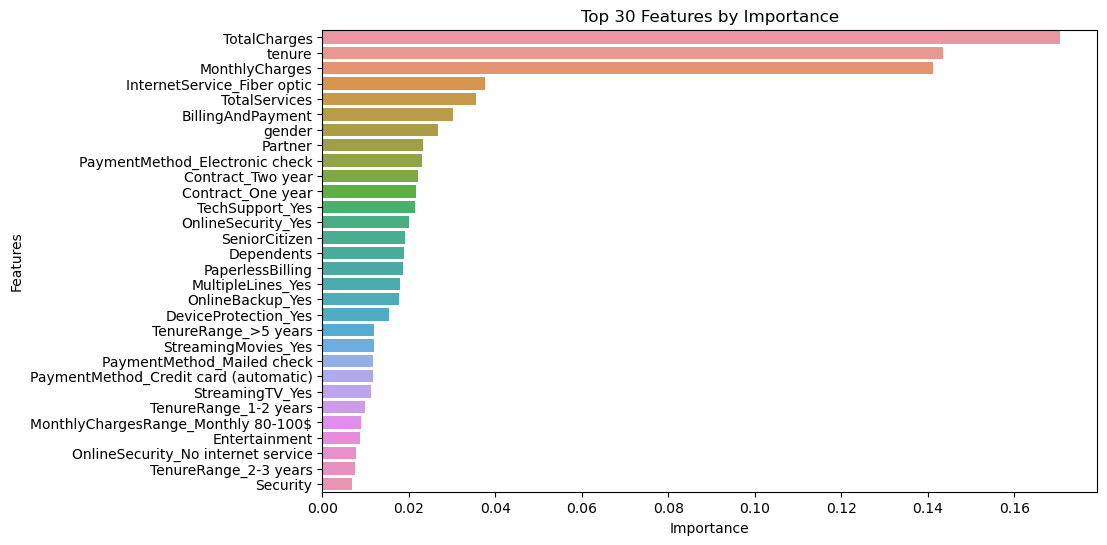

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

imp_table = imp_table.sort_values(by="Importance", ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=imp_table.head(30))
plt.title('Top 30 Features by Importance')
plt.show()


##Thank you. (References: https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction#After-going-through-the-above-EDA-we-will-develop-some-predictive-models-and-compare-them.)